## Importing Liabraries & Data set

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import linear_model, naive_bayes, neighbors, svm
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Exploratory Data Analysis

In [3]:
#Identifying Missing Values (if any)
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
df['Drug'].nunique()

5

In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
# There are 200 patients in all, with ages ranging from 15 to 74 with Na to K ratios of 6.269 and 38.247, respectively.

In [7]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [8]:
#Sex, bp and Cholestrol are categorical variable. 
#It would be better if we apply label encoder to avoid any error during model implementation.

## Visualisations

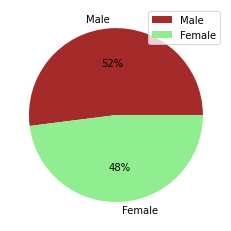

In [9]:
#Checking the proportion of male and female in the test
values=df['Sex'].value_counts()
plt.pie(values, labels = ["Male", "Female"], autopct='%1.0f%%', colors=['brown','lightgreen'])
plt.legend()

Text(0, 0.5, 'Sex')

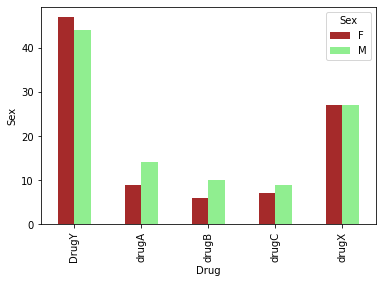

In [10]:
#Checking the proportion of male and female per drug type
pd.crosstab(df.Drug,df.Sex).plot(kind='bar',color=['brown','lightgreen'])
plt.xlabel('Drug')
plt.ylabel('Sex')

<AxesSubplot:xlabel='BP', ylabel='count'>

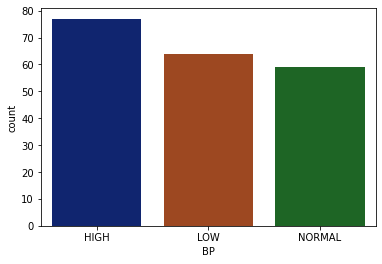

In [11]:
#Distribution of patients over the levels of BP
sns.countplot(df.BP, palette='dark')

Text(0, 0.5, 'BP level')

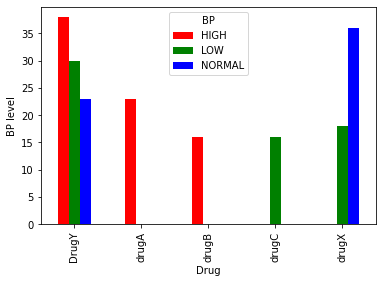

In [12]:
#Checking the proportion of male and female per drug type
pd.crosstab(df.Drug,df.BP).plot(kind='bar',color=['red','green','blue'])
plt.xlabel('Drug')
plt.ylabel('BP level')

DrugA & drugB have patients with HIGH blood pressure whereas drugC have LOW blood pressure patients. 
DrugX have HIGH & Low blood pressure patients & DrugY serves all types of BP patients

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

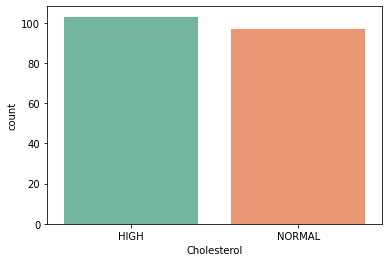

In [13]:
#Distribution of patients over the levels of Cholesterol
sns.countplot(df.Cholesterol, palette='Set2')

Text(0, 0.5, 'Cholestrol')

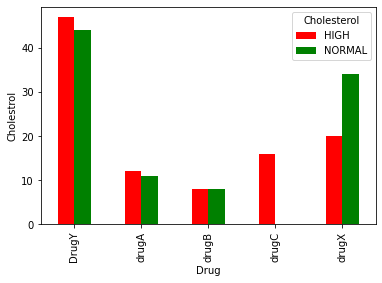

In [14]:
#Checking the proportion of male and female per drug type
pd.crosstab(df.Drug,df.Cholesterol).plot(kind='bar',color=['red','green'])
plt.xlabel('Drug')
plt.ylabel('Cholestrol')

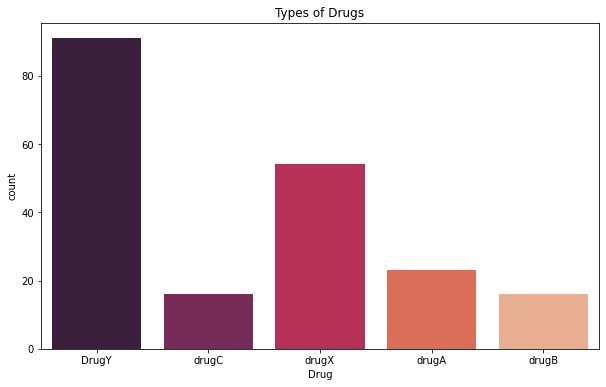

In [15]:
#Drug count
plt.figure(figsize=(10,6))
sns.countplot(x = df.Drug, palette="rocket")
plt.title("Types of Drugs")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

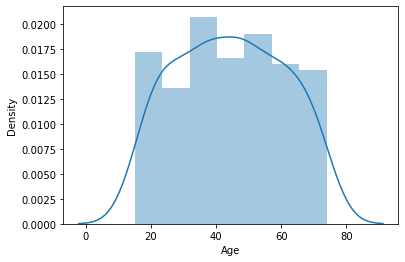

In [16]:
#Using distplot to check the Age range of the patients
sns.distplot(df.Age)

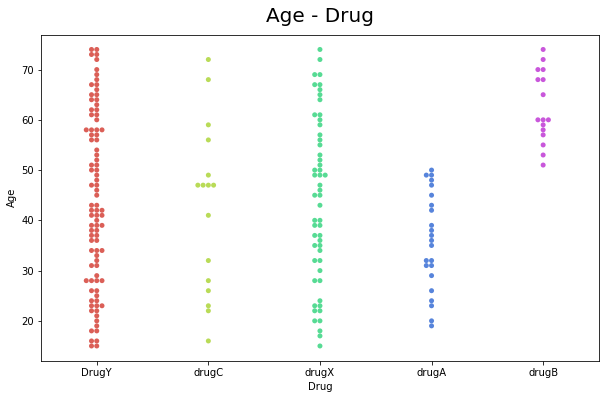

In [17]:
plt.figure(figsize = (10,6))
sns.swarmplot(x = "Drug", y = "Age", data = df, palette="hls")
plt.title("Age - Drug", fontsize=20, y=1.02)
plt.show()

<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

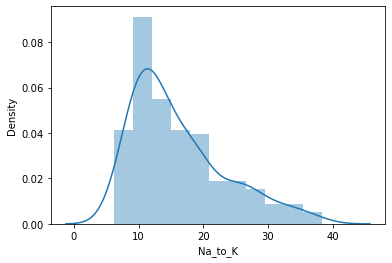

In [18]:
#Using distplot to check the sodium to potassium ratio in patient's blood
sns.distplot(df.Na_to_K)

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

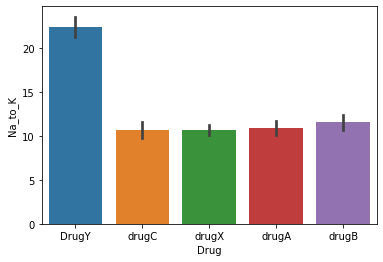

In [19]:
sns.barplot(x="Drug", y="Na_to_K", data=df)

## Pre-processing

#### 5 Features: ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'] & 1 Target Variable: Drug

In [20]:
X = df.drop("Drug", axis=1)
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [21]:
y = df["Drug"]
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [22]:
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['BP'] = le.fit_transform(X['BP'])
X['Cholesterol'] = le.fit_transform(X['Cholesterol'])
y = le.fit_transform(y)
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

## Decision Trees

In [23]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=4)
dtree.fit(X_train,y_train)
Dscore = dtree.score(X_test,y_test)
Dscore

1.0

In [24]:
Dpredict = dtree.predict(X_test)
confusion_matrix(y_test, Dpredict)

array([[26,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 18]], dtype=int64)

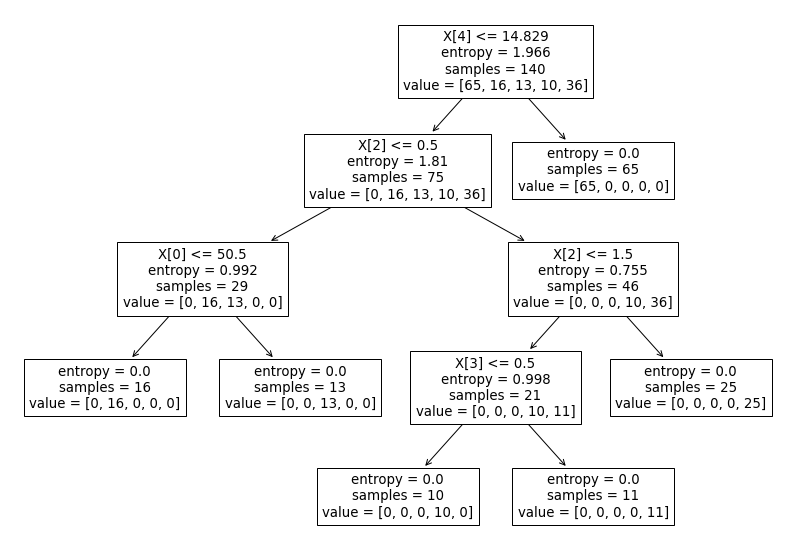

In [25]:
plt.subplots(figsize=(14,10))
dtr = tree.plot_tree(dtree)

## K-Nearest Neighbors Classifier

In [26]:
knc= KNeighborsClassifier()
knc.fit(X_train, y_train)
Kscore = knc.score(X_test,y_test)
Kscore

0.6333333333333333

In [27]:
kncPredict = knc.predict(X_test)
confusion_matrix(y_test, kncPredict)

array([[26,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  4],
       [ 0,  0,  1,  0,  2],
       [ 0,  2,  2,  1,  1],
       [ 0,  6,  3,  2,  7]], dtype=int64)

## Random Forest Classifier

In [28]:
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)
Rscore = Rfc.score(X_test,y_test)
Rscore

1.0

In [29]:
RfcPred = Rfc.predict(X_test)
confusion_matrix(y_test, RfcPred)

array([[26,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 18]], dtype=int64)

## Logistic Regression

In [51]:
Lreg = LogisticRegression() 
Lreg.fit(X_train, y_train) 
Lscore = Lreg.score(X_test, y_test) 
Lscore

0.7833333333333333

In [52]:
LregPredict = Lreg.predict(X_test) 
confusion_matrix(y_test, LregPredict)

array([[24,  0,  2,  0,  0],
       [ 3,  2,  2,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 2,  0,  0,  1,  3],
       [ 1,  0,  0,  0, 17]], dtype=int64)

## Gaussian Naive Bayes

In [30]:
nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)
Gscore = nb.score(X_test, y_test)
Gscore

0.9

In [31]:
nbPred = nb.predict(X_test)
confusion_matrix(y_test, nbPred)

array([[20,  1,  3,  2,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 18]], dtype=int64)

## Support Vector Machine

In [32]:
svm =svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
SVMscore = svm.score(X_test, y_test)
SVMscore

1.0

In [55]:
SVMPred = svm.predict(X_test)
confusion_matrix(y_test, SVMPred)

array([[26,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 18]], dtype=int64)

## Extra Trees

In [50]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
ETCscore = etc.score(X_test, y_test)
ETCscore

0.9666666666666667

In [56]:
ETCPred = etc.predict(X_test)
confusion_matrix(y_test, ETCPred)

array([[24,  0,  2,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 18]], dtype=int64)

## Model Comparison

In [53]:
pd.DataFrame(data={'Model': ['Logistic Regression', 'Gaussian Naive Bayes', 'K_Nearest Neighbours', 
                   'RandomForestClassifier', 'Decision Tree Classifier', 'Support Vector Machine(SVM)', 'Extra Trees Classifier'], 
                   'Accuracy %':[Lscore, Gscore, Kscore, Rscore, Dscore, SVMscore, ETCscore]})

,Model,Accuracy %
0,Logistic Regression,0.783333
1,Gaussian Naive Bayes,0.900000
2,K_Nearest Neighbours,0.633333
3,RandomForestClassifier,1.000000
4,Decision Tree Classifier,1.000000
5,Support Vector Machine(SVM),1.000000
6,Extra Trees Classifier,0.966667


Text(0.5, 1.0, 'Model Comparison')

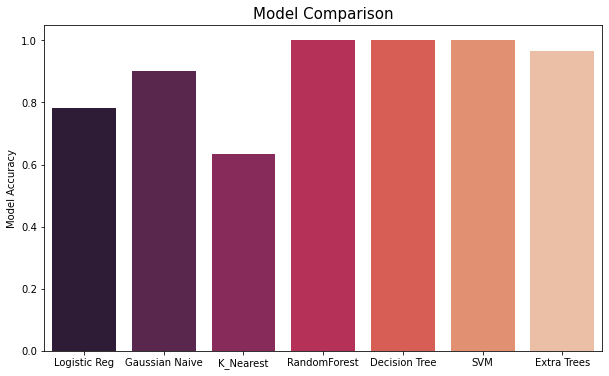

In [58]:
x = ['Logistic Reg', 'Gaussian Naive', 'K_Nearest', 'RandomForest', 'Decision Tree', 'SVM', 'Extra Trees']

y = [Lscore, Gscore, Kscore, Rscore, Dscore, SVMscore, ETCscore]

plt.subplots(figsize=(10,6))
sns.barplot(x=x,y=y, palette="rocket");
plt.ylabel("Model Accuracy")
plt.title("Model Comparison", fontsize=15)

In [35]:
#Decision Tree, Random forests and SVM all successfully predicted 100% of the drug types that the patients should be assigned.